# Lab Assignment One: Exploring Table Data

By: Maria Heredia, Manov Jain, Troy McNitt

## 1. Business Understanding

For this assignment, we have chosen to look at the adult census dataset from UCI. The raw data was collected during the 1994 US Census and later formatted by Barry Becker in 1996. The dataset includes 14 attributes and looks to predict if an individual makes over $50,000 in income a year. 

Adjusted for [inflation](https://www.in2013dollars.com/us/inflation/1994?amount=50000), this equals a 2021 income of $92,106. That level of income would put an individual in the 82nd percentile of US [incomes](https://dqydj.com/income_percentile_calculator/).
 
This information is critical for policymakers and the general public to identify features that may equate to a better chance of earning a higher income. If any factor has a large impact on earnings, it is critical the public understand it as soon as possible in their life. It is equally important that governments at all levels understand what different factors play into the success of citizens, so they can attempt to bolster that behavior. The inverse is also important, as it informs possible biases that exist in society that may discriminate against certain members of society. 

## 2. Data Understanding

### 2.1 Data Description

The data is given to us as a CSV, which we can easily load using Pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)
%matplotlib inline


# Data is given without column names
columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'above_50K_income'
]

df = pd.read_csv('adultdata.csv', names=columns, index_col=False, sep=', ', engine='python')

# Convert str 50K income to boolean
df['above_50K_income'] = df['above_50K_income'] == '>50K'

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,above_50K_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


As seen above, we can see a preview of the dataset. This shows all of the 15 attributes of the first 5 rows.

Next, we will be looking at the type of data provided in the set.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_num     32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital_gain      32561 non-null  int64 
 11  capital_loss      32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  above_50K_income  32561 non-null  bool  
dtypes: bool(1), int64(6), object(8)
memory usage: 3.5+ MB


Based on the data frame above, it can be seen that all 15 attributes have the same number of entries (32561). This is just one of the checks for missing data but shows there are no columns with a 'None' value

To take a closer look at the data, we will create a table to see all the attributes with their corresponding description, scale, type of variable, and range. 

In [3]:
# create a data description table
data_des = pd.DataFrame()
data_des['Features'] = df.columns
data_des['Description'] = ['age', 
                           'work class identification',
                           'final weight', 
                           'education level',
                           'education ranking', 
                           'martial status identification',
                           'type of occupation', 
                           'type of relationship',
                           'race identification',
                           'sex identification',
                           'individual capital gain',
                           'individual capital lose',
                           'amount of hours working per week',
                           'individual native country',
                           'do they have above 50k income'
                          ]
data_des['Scales'] = ['ratio', 
                       'nominal',
                       'ratio', 
                       'ordinal',
                       'ordinal', 
                       'nominal',
                       'nominal', 
                       'nominal',
                       'nominal',
                       'nominal',
                       'ratio',
                       'ratio',
                       'ratio',
                       'nominal',
                       'nominal'
                        ]
data_des['Discrete\Continuous'] = ['continuous', 
                                   'discrete',
                                   'continuous', 
                                   'discrete',
                                   'discrete', 
                                   'discrete',
                                   'discrete', 
                                   'discrete',
                                   'discrete',
                                   'discrete',
                                   'continuous',
                                   'continuous',
                                   'continuous',
                                   'discrete',
                                   'discrete'
                                   ]
data_des['Range'] = ['17-19', 
                    'Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked',
                    '12,285 - 148,4705', 
                    'Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.',
                    '1-16', 
                    'Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse',
                    'Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces', 
                    'Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried',
                    'White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black',
                    'Female, Male',
                    '0-99999',
                    '0-4356',
                    '1-99',
                    'United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands',
                    'True, False'
                    ]

data_des

,Features,Description,Scales,Discrete\Continuous,Range
0,age,age,ratio,continuous,17-19
1,workclass,work class identification,nominal,discrete,"Private, Self-emp-not-inc, Self-emp-inc, Feder..."
2,fnlwgt,final weight,ratio,continuous,"12,285 - 148,4705"
3,education,education level,ordinal,discrete,"Bachelors, Some-college, 11th, HS-grad, Prof-s..."
4,education_num,education ranking,ordinal,discrete,1-16
5,marital_status,martial status identification,nominal,discrete,"Married-civ-spouse, Divorced, Never-married, S..."
6,occupation,type of occupation,nominal,discrete,"Tech-support, Craft-repair, Other-service, Sal..."
7,relationship,type of relationship,nominal,discrete,"Wife, Own-child, Husband, Not-in-family, Other..."
8,race,race identification,nominal,discrete,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,..."
9,sex,sex identification,nominal,discrete,"Female, Male"


By looking at the descriptive table and data frame above, it appears that each attribute has a reasonable data type. Hence, there is no need to manipulate or change the data types of any of the attributes. The data originally had the 'above 50K income' column given as either '>=50k' or '<50k', which we converted to a boolean above.

Now, let's take a closer look at the continuous attributes through a descriptive table.

In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In the table above, there are a couple attributes that are interesting to note:

Age:
- To start of with the age attribute, the minimum is 17 and the maximum is 90. This makes sense since the curators of data only queried the census data for all data for the ages between 17 and 90. The rational is that this range represents the working population in the US.  
     
Final Weight (fnlwgt):
- Final weight is calculated by the dataset curators as an overall mechanism to compare two entries. The value is sourced from state-wide demographic information to represent how common an entry is in the overall population. Similar values within the same state demonstrates that two features of the two rows are similarly common in the population. 

Education Ranking (education_num):
- Next, the 'education_num' attribute is on an ordinal scale. This attribute is ranking individuals from 1-16 with 1 refering to the lowest education level and 16 refering to the highest level of education. While we could change this data type, it does a nice job encoding them into an ordered representation so we can use for further analysis. After looking at the raw dataset, the rankings are in the following order: 
    * 1: Preschool
    * 2: 1st-4th 
    * 3: 5th-6th 
    * 4: 7th-8th 
    * 5: 9th
    * 6: 10th
    * 7: 11th 
    * 9: HS-grad
    * 10: Some-college
    * 11: Assoc-voc
    * 12: Assoc-acdm
    * 13: Bachelors
    * 14: Masters
    * 15: Prof-school
    * 16: Doctorate

Capital Gain:
- When looking at the maximum for this attribute, it is a capital gain of \$99,999. This appears to be a cut-off level in the dataset. This means that there is a possibility of individuals having a capital gain of more than \$99,999, thus making the data less accurate. However, if someone is making more than \$99,999 in capital investments each year, it is very safe (if not perfectly safe) to assume they make they are taking in over \$50,000 in income a year.

Hours per Week:
- Simiarly, when looking at the maximum for this attribute, it is working 99 hours a week. This also appears to be a cut-off level in the dataset. There could be a possiblitity of individuals working more than 99 hours which is realistic in modern society. However, because this census was taken in 1994, there is no way to verify that individuals were working more than 99 hours a week. Morever, these values can make the dataset less accurate.

### 2.2 Data Quality

Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes.

After going through the data, we noticed that some rows have a '?' value for workclass, occupation, and native country. This represents data that either the census worker could not read or the respondant simply did not fill out. We find a mistake in 2399 rows. This also shows us that over half of the rows have more than one of the attributes missing. Since our dataset includes over 30K responses, we decided to simply not consider this data. While we could use imputation to try to fill in the missing data, since over 50% of the rows have more than one column missing, we could make too broad of assumptions that would make our analysis less valid.

In [5]:
# We can locate missing values
for column in df.columns:
    empty = df.loc[df[column] == '?']
    if empty.shape[0] > 0:
        print('Column {} missing {} values'.format(column, empty.shape[0]))

to_remove = (df['workclass'] == '?') |( df['occupation'] == '?') | (df['native_country'] == '?')

print('Removing {} rows from {} total, representing {:.2f}%'.format(to_remove.sum(), df.shape[0], (to_remove.sum()/df.shape[0])*100.0))

# Leaves us with over 30,000 datapoints, so we will remove them
df = df[~to_remove]

Column workclass missing 1836 values
Column occupation missing 1843 values
Column native_country missing 583 values
Removing 2399 rows from 32561 total, representing 7.37%


## 3. Data Visualization

### 3.1 Visualize Basic Feature Distributions

#### Plot 1: Age Distribution (Histogram)

Text(0.5, 1.0, 'Age Distribution Histogram')

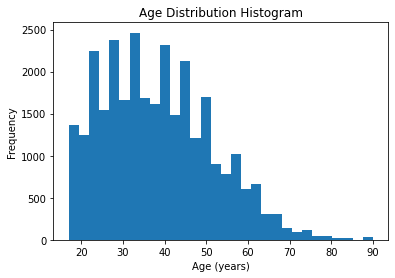

In [6]:
df.age.plot(kind='hist', bins=30)
plt.xlabel('Age (years)')
plt.title('Age Distribution Histogram')

By looking at the graph, it appears that the histogram almost takes a quadratic shape function. This means that there are more young people entering their young adulthood to middle age years present in the data compared to older generations. This representation in the dataset is interesting because this demographic age group represents the baby boomers who have now grown up to adulthood. Looking at the years of 60 and above, there is a significant decrease in frequency of these adults in the dataset. Unfortunately, people pass away. It means that this age group, the older generations, could represent the number of people who fought in World War 1. This low frequency is alluding to the fatalities, casualties, and injuries of those who fought in WW1 who did not make it that far in their lifespan. 

#### Plot 2: Making Above 50k by Sex and Age (Boxplot) and Making Above 50k by Occupation (Histogram)

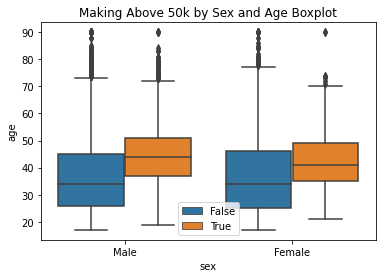

In [7]:
# sns boxplot
sns.boxplot(x="sex", y="age", hue="above_50K_income", data=df)
plt.title('Making Above 50k by Sex and Age Boxplot')
plt.legend(loc='best')
plt.show()

By looking at the graph above, it represents individuals who are making above 50k grouped by age and sex. The blue “false” refers to those not making above 50k while the red “true” shows those making above 50k. By glancing at the plot, it almost appears that there is no difference between male and female when making, or not making, above 50k. This is interesting to see because our group expected to see a significant increase of more men working than women because of traditional, outdated views. However, in the 1990s, women participating in the workforce significantly increased due to demand for labor, education level increasing, etc. However, looking more closely at the graph, it can be seen that the 50th percentile of both men and women who are making above 50k is somewhere between the ages of 40 to 50. Realistically speaking, this is accurate because by that age, individuals have already been in the work field for a couple of decades. Thus, they have been able to “climb the ladder” career wise and could mean that they have a stable job, thus having a stable salary and making above 50k. On the other hand, when looking at those who are not making above 50k, both men and females including, the 50th percentile falls between the ages mid 30s. This could represent those who are working between jobs or are working part time, thus not having a stable job to make them earn a salary above 50k. Furthermore, when looking at the 90th percentile of men and females who are making 50k, it appears that it falls between the ages of 70 to the mid 70s. This alludes to where both, men and females, have stopped participating in the workfield and reached the age of retirement. On the other hand, there are various points where there are outliers in the data on both female and male making and not making above 50k. This represents the individuals who are no longer part of the workplace.

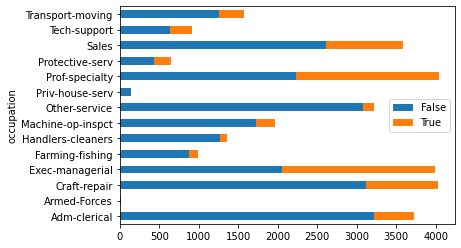

In [8]:
pd.crosstab(df['occupation'], df['above_50K_income'].astype(bool)).plot(kind='barh', stacked=True)
plt.legend(loc='best')

This plot is visualizing the frequency of those making above 50k or not making above 50k based on their occupation. At a glance, the two categories that set the occupations apart are trade and white collar jobs. The white collar jobs present in the data set include ‘prof-speciality,’ ‘sales,’ and ‘exec-managerial.’ The trade jobs include all the other occupations. Starting with these white collar jobs, it is not surprising to see that these occupations are the ones who have the highest frequency when it comes to making above 50k. These types of white collar jobs are the occupations that are most stable in terms of income in comparison to trade jobs since they are done in the office and for most of these occupations, individuals need a degree to enter these types of white collar jobs. On the other hand, the trade jobs, such as private house services and cleaners, are not stable jobs since they do not require a degree to complete that type of job. Thus, not having a job that is considered stable, in terms of working hours and salary, causes the frequency of these individuals who partake in that type of work field to not be earning above 50k. 

#### Plot 3: Distribution of Hours per Week by Occupation (Histogram & Violin Plot)

Text(0.5, 1.0, 'Distribution of Working Hours per Week')

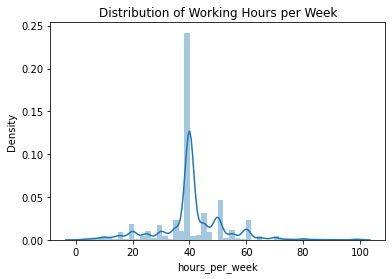

In [9]:
cmap = sns.diverging_palette(50, 50, as_cmap=True)

sns.distplot(df.hours_per_week)
plt.title('Distribution of Working Hours per Week')

Text(0.5, 1.0, 'Working hours per week by Occupation')

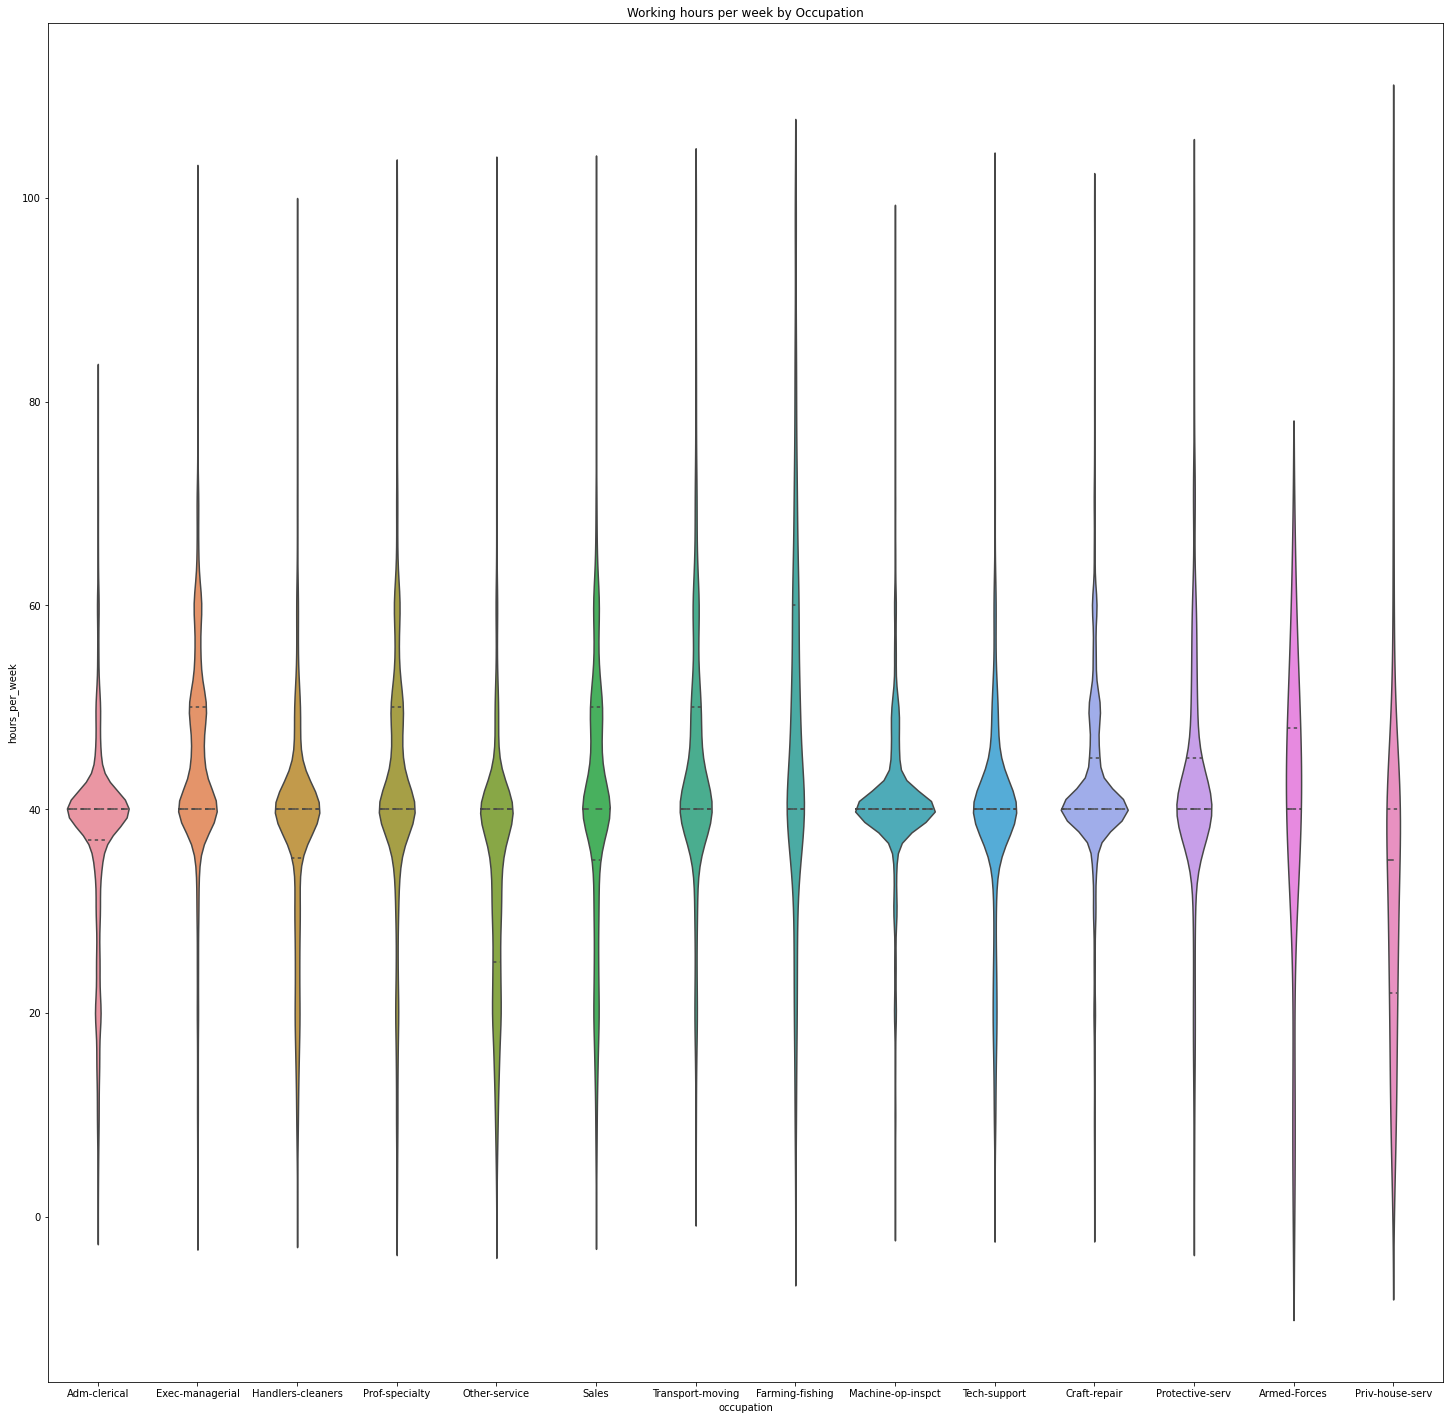

In [10]:
f, ax = plt.subplots(figsize=(25, 25))
sns.violinplot(x="occupation", y="hours_per_week", data=df, split=True, inner="quart")
plt.title('Working hours per week by Occupation')

When looking at the first plot, the distribution of working hours per week, it can clearly be seen that working 40 hours per week has the highest frequency meaning it also has the highest density. In this case, it can also be seen that the density plot has no skew, thus referring that the mean is probably around the same as the median which in this case is working 40 hours a week. This is not surprising because a work week in the United States is considered 40 hours traditionally. Looking at the second plot, it seems that almost all occupations have a median of individuals working 40 hours per week. This shows that no matter the occupation, whether it is a trade or white collar jobs, Americans during this time had a median of working 40 hours a week which goes in hand with the first plot that is showing the distribution of weekly working hours.  

#### Plot 4: Education or Martial Status Distribution ? (not sure what type of plot I want to do yet)

In [11]:
# sns.swarmplot(x="sex", y="education_num", hue="above_50K_income", data=df)
# plt.title('Swarm Example')

Analysis:

#### Plot 5: Correlation Matrix Plot

Text(0.5, 1.0, 'Correlation Matrix')

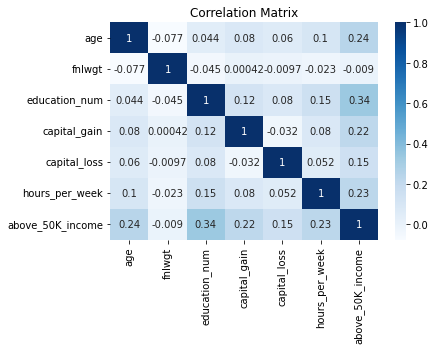

In [12]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Correlation Matrix')

This plot shows a correlation matrix between all of the continuous attributes present in the data. When looking at the matrix, the highest correlation value is between ‘education_num’ and ‘above_50k_income’ which is 0.32. From this, it means that the higher the education level an individual has, the more income the individual is earning. On the other hand, the lowest correlation value is between ‘fnlwgt’ (the final weight) and all other attributes. Some of these correlation matrix coefficient values are even close to 0 which means there is no relationship between the final weight and the other attributes. This is how it is supposed to be since the final weight should have no impact on the other continuous attributes since final weight is independent of the other features. Another interesting correlation value to notice is the one between hours_per_week vs capital_gain which is 0.08. This is interesting because our group would have expected individuals who are working more to have a higher capital gain because they could be getting paid more due to working overtime. Another Interesting relationship is between  hours_per_week and above_50k_income which the correlation value is 0.23. This is the second highest value on the matrix and this is not surprising because the more individuals work, the more they are expected to earn. The last interesting correlation is between education_num and age which has a value of 0.044. Before looking at this number, it would be thought that the older an individual is, the higher the probability of being that individual is more educated. However, in the first plot of age distribution, it shows that there is not a large representation of older generations in the 1994 US Census. This could mean that the older generations did not get a chance to get a higher education since they might have been entering the world field at a younger age or they could have been deployed for WW1.

### 3.2 Interpret Questions with Visualizations

Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data. Important: Interpret the implications for each visualization.

#### Question 1: Does race and sex of an individual impact if their income is more than $50k?

<AxesSubplot:ylabel='race,sex'>

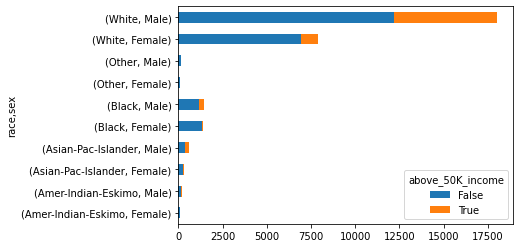

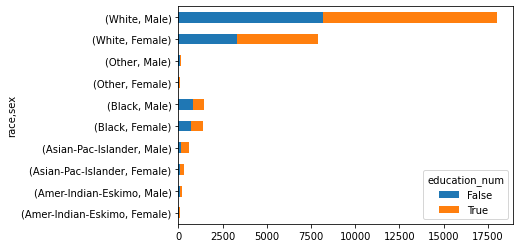

In [13]:
# ADD: titles (plt.title(), x-axis labels plt.xlabel()

pd.crosstab([df['race'], df['sex']], df['above_50K_income'].astype(bool)).plot(kind='barh', stacked=True)
pd.crosstab([df['race'], df['sex']], (df['education_num'] > 9).astype(bool)).plot(kind='barh', stacked=True)

In the above graphs we see the amount of people people who earn above $50k based on race and gender. We also see the amount of people who have at least a high school education, again based on race and sex. As seen above, white males have a much higher percentage of people earning over $50k. White women have the next highest percentage, but it is much lower than white males. This could be due to many factors including but not limited to the patriarchal “provider” roles that many men in American families play, while their spouses (often other white females) are expected to be stay at home parents. This is changing rapidly, we may see a much different story told by the data within the next 10 years. This is still surprising as it appears that white women have the highest percentage of people with at least a high school education. This supports the theory mentioned above, but is still surprising considering the disparity in income that we see above.

When looking into the education numbers, we can see that of the races, non-white males and females actually have high amounts of educated individuals. This is interesting, because you would expect that the disparity in income may be due to lower amounts of education, but this does is not reflected in the data.

#### Question 2: Does divorce impact an individual's income for those educated beyond highschool?

<AxesSubplot:title={'center':'Percentage making over 50K'}, ylabel='marital_status,education_num'>

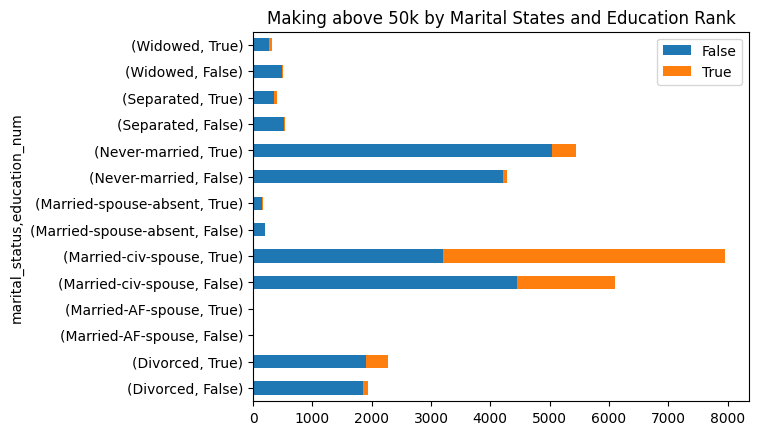

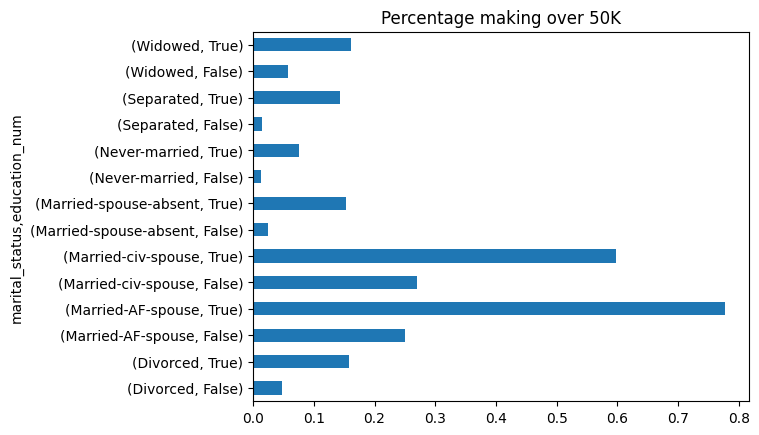

In [59]:
crossed = pd.crosstab([df['marital_status'], (df['education_num'] > 9)], df['above_50K_income'])

crossed.plot(kind='barh', stacked=True)
plt.legend(loc='best')
plt.title('Making above 50k by Marital States and Education Rank')

plt.figure()
plt.title('Percentage making over 50K')
(crossed[:][1] / (crossed[:][0] + crossed[:][1])).plot(kind='barh', stacked=True)

Of individuals with at least a high school education, it seems that the group of people who are married are most likely to make $50k. This supports the theory mentioned in the race and gender mentioned in the first question. It also may be an indicator that being married doesn’t increase the chance of having higher income, but instead that individuals are waiting until they have higher earning to get married. This is hard to understand without access to a deeper dataset, but is an interesting thing to consider. Being divorced, while not having a great chance at a high income, is not actually the worst. It certainly isn’t great though, as it seems that even when having a high school education, divorced individuals are making much less income than married individuals. Being separated or widowed seems to the group of people who earn the least. This may be because of the emotional and mental stress of separation or the death of a spouse. This is supported by the fact that those who are never married seem to have a higher chance of making above $50k. It could also be due to other reasons that are difficult to understand with the given information.

#### Question 3: Do married white men earn more than 50k more often than every other group?

White, married men make up 38.0% of the data
However, they make up 70.0% of the individuals making over 50k


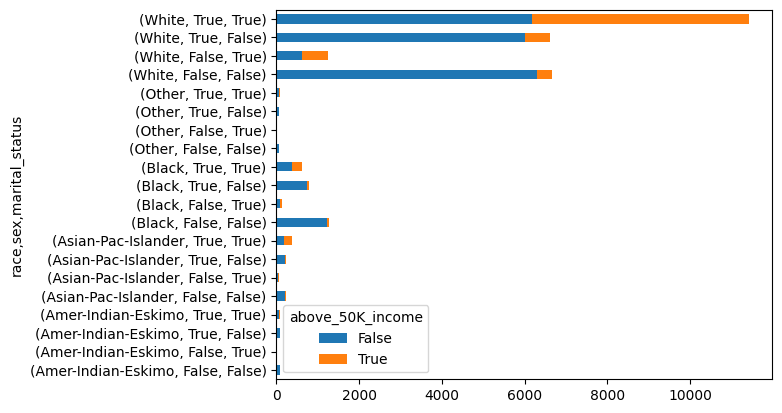

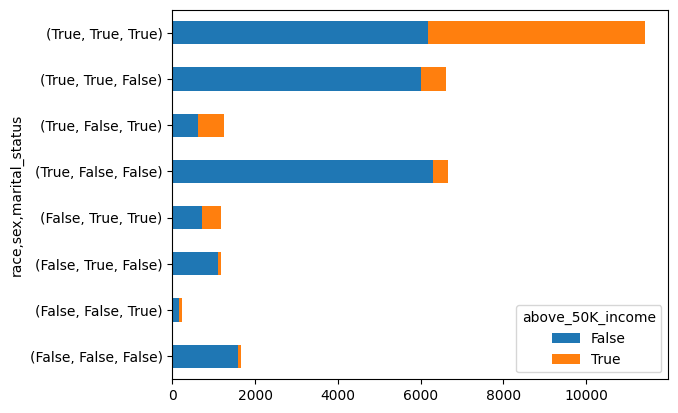

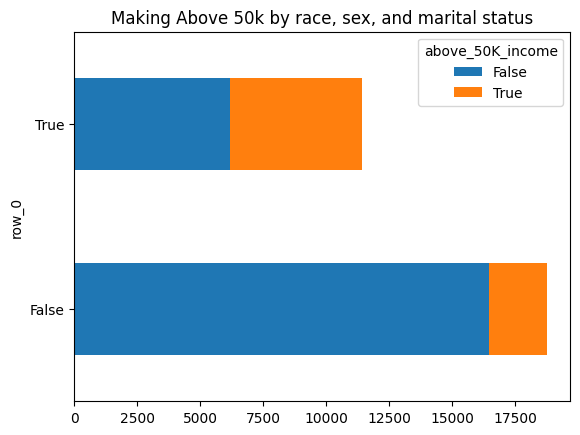

In [66]:
# Original
pd.crosstab([df['race'], (df['sex'] == 'Male'), (df['marital_status'] == 'Married-civ-spouse')], df['above_50K_income']).plot(kind='barh', stacked=True)

# To whoever is working on this chart, here's two alternatives to think about

# 1. 
pd.crosstab([df['race'] == 'White', (df['sex'] == 'Male'), (df['marital_status'] == 'Married-civ-spouse')], df['above_50K_income']).plot(kind='barh', stacked=True)

white_married_men = (df['race'] == 'White') & (df['sex'] == 'Male') & (df['marital_status'] == 'Married-civ-spouse')
# 2. 
pd.crosstab(
    [white_married_men], df['above_50K_income']
).plot(kind='barh', stacked=True)

plt.title('Making Above 50k by race, sex, and marital status')


percentage_wmm = df[white_married_men].shape[0] / df.shape[0]
percente_wmm_over_50k = df[white_married_men]['above_50K_income'].sum() / df['above_50K_income'].sum()

print('White, married men make up {}% of the data'.format(round(percentage_wmm * 100, 0)))
print('However, they make up {}% of the individuals making over 50k'.format(round(percente_wmm_over_50k * 100, 0)))

Looking at the graph above, we see that white married men have a significantly higher percentage of people who make above $50k. While only making up 30% of the dataset, they make up for 70% of the over 50K group. This should at this point come as no surprise, as we have looked into this group quite a bit now. But we should try to understand why. As mentioned above, this could be due to the patriarchal “provider” role that men are expected to play in America. It could also be due to people who are married having more income in general. Likely it is due to many more reasons, but we don’t have enough data present to make a single conclusion. We can see that other races, regardless of sex, have a much lower amount of people who make above $50k. This is all likely due to inequality both for women and minorities. 

 *extra question:  Do people who are self employed and earn above \\$50k annually have higher average capital gains than those are self employed and earn less than $50k?*

## 4. Exceptional Work

For our example work, we look to explore a classifier based on some of the questions we asked above. Out first attempt is to just use the ordinal/numeric data since we can input those to the classifiers. From there we split the dataset into train/test. We use the train data to fit a random forest classifier. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


X = df[['age', 'education_num', 'hours_per_week']]
y = df['above_50K_income']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

Training accuracy: 0.8535243021019826
              precision    recall  f1-score   support

       False       0.81      0.89      0.85     11287
        True       0.55      0.39      0.45      3794

    accuracy                           0.77     15081
   macro avg       0.68      0.64      0.65     15081
weighted avg       0.75      0.77      0.75     15081



<AxesSubplot:>

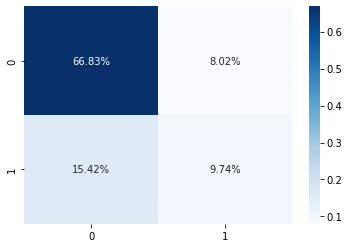

In [17]:
# Standard scaler to remove mean and scal with variance
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
rf_model = clf.fit(x_train, y_train)

print('Training accuracy:', rf_model.score(x_train, y_train))

predicted = pd.DataFrame(rf_model.predict(x_test))

print(metrics.classification_report(y_test, predicted))

cf_matrix = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

We achieve a training accuracy score of 85% and validation score of 76%. At first, this seems to represent a good result. However after looking at the confusion matrix, we can see this model has little to no predicative power, as it has about more false negatives than true positives. In order the data better, we fit a 2 component PCA to the input data used and plot the results.

Text(0, 0.5, '-0.41*age +0.03*education_num +0.91*hours_per_week ')

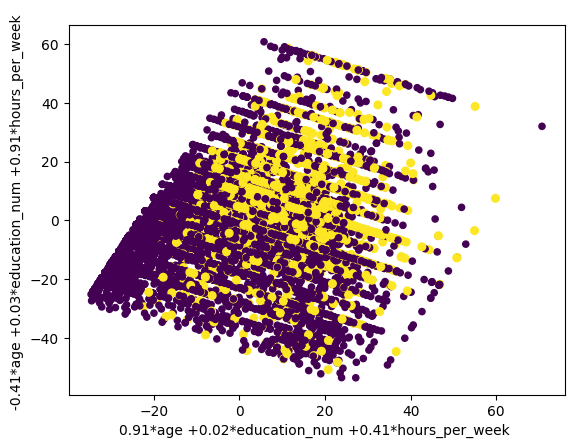

In [18]:
pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)


cmap = sns.set(style="darkgrid") 
# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f)
        tmp_array.append(tmp_string)
    return tmp_array
  
plt.style.use('default')
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, X.columns) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

from matplotlib.pyplot import scatter

# scatter plot the output, with the names created from the weights
ax = scatter(X_pca[:,0], X_pca[:,1], c=y, s=(y+2)*10)
plt.xlabel(pca_weight_strings[0]) 
plt.ylabel(pca_weight_strings[1])


This explains why the random forest had such trouble, as it shows there is little covariance between the different variables. To hopefully improve performance, we take all the categorical features, one-hot encode them, and use it to a fit a 1 dimension PCA. We can use this pca alongside the numerical data in the classifier. We make sure to only fit the one hot encoder and PCA on the train data, to avoid validation data leakage.

In [19]:
X = df[['age', 'education_num', 'hours_per_week', 'sex', 'race', 'occupation', 'workclass', 'marital_status', 'relationship', 'native_country']].copy()

X['pca'] = None
X['has_capital_income'] = df['capital_gain'] > df['capital_loss']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

cols = ['sex', 'race','occupation','workclass','marital_status','relationship','native_country', 'has_capital_income']

encoder = OneHotEncoder(sparse=False)
train_one_hot_encoded = encoder.fit_transform(x_train[cols])
test_one_hot_encoded = encoder.transform(x_test[cols])

pca =  PCA(n_components=1)

x_train = x_train.copy()
x_test = x_test.copy()

x_train['pca'] = pca.fit_transform(train_one_hot_encoded)
x_test['pca'] = pca.transform(test_one_hot_encoded)

x_train = x_train.drop(columns=cols)
x_test = x_test.drop(columns=cols)


Training accuracy: 0.9795769511305616
              precision    recall  f1-score   support

       False       0.85      0.89      0.87     11287
        True       0.63      0.54      0.58      3794

    accuracy                           0.81     15081
   macro avg       0.74      0.72      0.73     15081
weighted avg       0.80      0.81      0.80     15081



<AxesSubplot:>

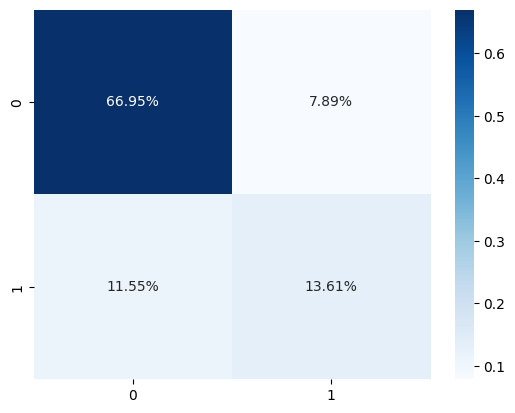

In [20]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
rf_model = clf.fit(x_train, y_train)

print('Training accuracy:', rf_model.score(x_train, y_train))

predicted = pd.DataFrame(rf_model.predict(x_test))

print(metrics.classification_report(y_test, predicted))

cf_matrix = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

These results, while still not great, are an improvement over the previous attempt. We achieve a 4% improvement on validation accuracy. We achieve a much larger increase on the training accuracy, which hits 94%. This difference means most of our gains probably came from overfitting, probably highlights the simplicity of our random forest model. However the biggest improvement is that we also achieve a higher true positive rate than a false negative rate. This would indicate some predictive power. 